# Oring Failure Model

## Project Description
One of the reasons for the Challenger disaster of January 1986 was reported the O-ring failure; you can watch a short video: (https://www.youtube.com/watch?v=yibNEcn-4yQ)
Six O-rings were used to seal field joints on the rocket motor assembly. The Oring.csv file presents the launch temperatures. A "1" means that at least one O-ring failure had occurred on the launch.

Build a Model to predict the probability of O-ring failure at different temperatures.


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Oring.csv')
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, -1].values
dataset.head() # show the first few rows

,Temperature,Failure
0,53,1
1,56,1
2,57,1
3,63,0
4,66,0


## Logistic Regression Classifier

In [3]:
from sklearn.linear_model import LogisticRegression
LogitReg = LogisticRegression()
LogitReg.fit(X, y)

LogisticRegression()

## Checking the Probability of Failure at a Temperature

In [4]:
New_Temperature=80

Probability=LogitReg.predict_proba([[New_Temperature]])

print("Chance of Failure is ", 100*Probability[0,1], "%" )

Chance of Failure is  5.610747924099 %


## Fail (1) & Not Fail (0)

In [5]:
LogitReg.predict([[New_Temperature]])

array([0], dtype=int64)

## Visualising the Logistic Regression

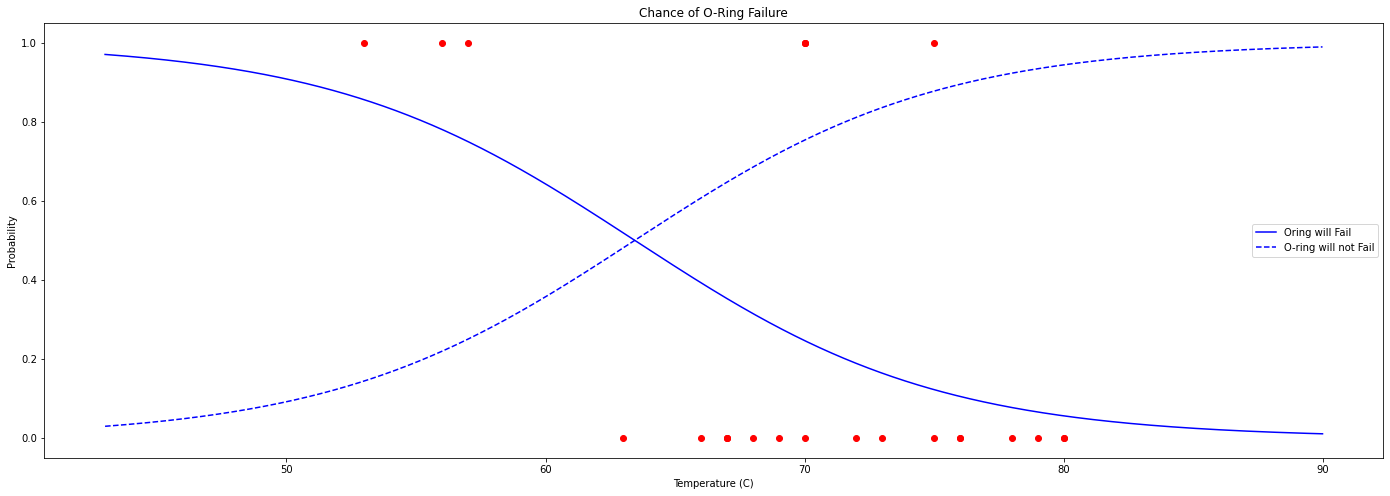

In [6]:
# We just need to create more data, perhaps in range of +/-10 of max and min of current data
X_grid = np.arange(min(X)-10, max(X)+10, 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')

Probability=LogitReg.predict_proba(X_grid)
plt.plot(X_grid, Probability[:,1], "b", label="Oring will Fail")
plt.plot(X_grid, Probability[:,0], 'b--', label="O-ring will not Fail")

# ---- just to make the plot nicer-----
plt.legend(loc='best')
plt.title('Chance of O-Ring Failure')
plt.xlabel('Temperature (C)')
plt.ylabel('Probability')
plt.gcf().set_size_inches(24, 8)
plt.rcParams.update({'font.size': 30})
plt.show()

##### End